# Data Science Workflow Template

This notebook provides a template for typical data science workflows using pandas, matplotlib, and seaborn.

**What you'll learn:**
- Data loading and exploration
- Data cleaning and preprocessing
- Statistical analysis
- Data visualization
- Machine learning basics

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")

✓ Libraries imported successfully
pandas version: 2.3.3
numpy version: 2.3.4


## 2. Generate Sample Dataset

In a real project, you'd load actual data using:
```python
df = pd.read_csv('your_data.csv')
# or
df = pd.read_excel('your_data.xlsx')
# or
df = pd.read_sql('SELECT * FROM table', connection)
```

In [2]:
# Generate synthetic dataset
n_samples = 1000

data = {
    'age': np.random.randint(18, 80, n_samples),
    'income': np.random.normal(50000, 20000, n_samples),
    'experience': np.random.randint(0, 40, n_samples),
    'education_level': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], n_samples),
    'satisfaction_score': np.random.uniform(1, 10, n_samples)
}

df = pd.DataFrame(data)

# Add some derived features
df['income_per_year_exp'] = df['income'] / (df['experience'] + 1)
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle', 'Senior'])

print(f"✓ Dataset created with {len(df)} rows and {len(df.columns)} columns")

✓ Dataset created with 1000 rows and 7 columns


## 3. Initial Data Exploration

In [3]:
# Display first few rows
print("First 5 rows:")
display(df.head())

# Dataset info
print("\nDataset Info:")
df.info()

# Basic statistics
print("\nBasic Statistics:")
display(df.describe())

First 5 rows:


,age,income,experience,education_level,satisfaction_score,income_per_year_exp,age_group
0,56,77447.555931,39,Master,8.558214,1936.188898,Senior
1,69,36444.278140,20,PhD,2.696865,1735.441816,Senior
2,46,73070.637440,27,High School,7.052144,2609.665623,Middle
3,32,42499.787433,10,Master,9.793063,3863.617039,Middle
4,60,36117.080930,33,Master,1.917038,1062.267086,Senior



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  1000 non-null   int64   
 1   income               1000 non-null   float64 
 2   experience           1000 non-null   int64   
 3   education_level      1000 non-null   object  
 4   satisfaction_score   1000 non-null   float64 
 5   income_per_year_exp  1000 non-null   float64 
 6   age_group            1000 non-null   category
dtypes: category(1), float64(3), int64(2), object(1)
memory usage: 48.1+ KB

Basic Statistics:


,age,income,experience,satisfaction_score,income_per_year_exp
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,50904.048072,19.842000,5.440125,5249.092282
std,18.114267,21354.404434,11.485162,2.583700,9311.990112
min,18.000000,-21364.105987,0.000000,1.005881,-2445.423034
25%,35.000000,37444.072278,10.000000,3.159418,1524.694446
50%,50.000000,51328.618127,20.000000,5.393485,2395.333720
75%,66.000000,65263.970355,30.000000,7.726192,4541.196797
max,79.000000,113488.842743,39.000000,9.996019,86415.607534


In [4]:
# Check for missing values
missing = df.isnull().sum()
if missing.sum() > 0:
    print("Missing values:")
    print(missing[missing > 0])
else:
    print("✓ No missing values found")

✓ No missing values found


## 4. Data Visualization

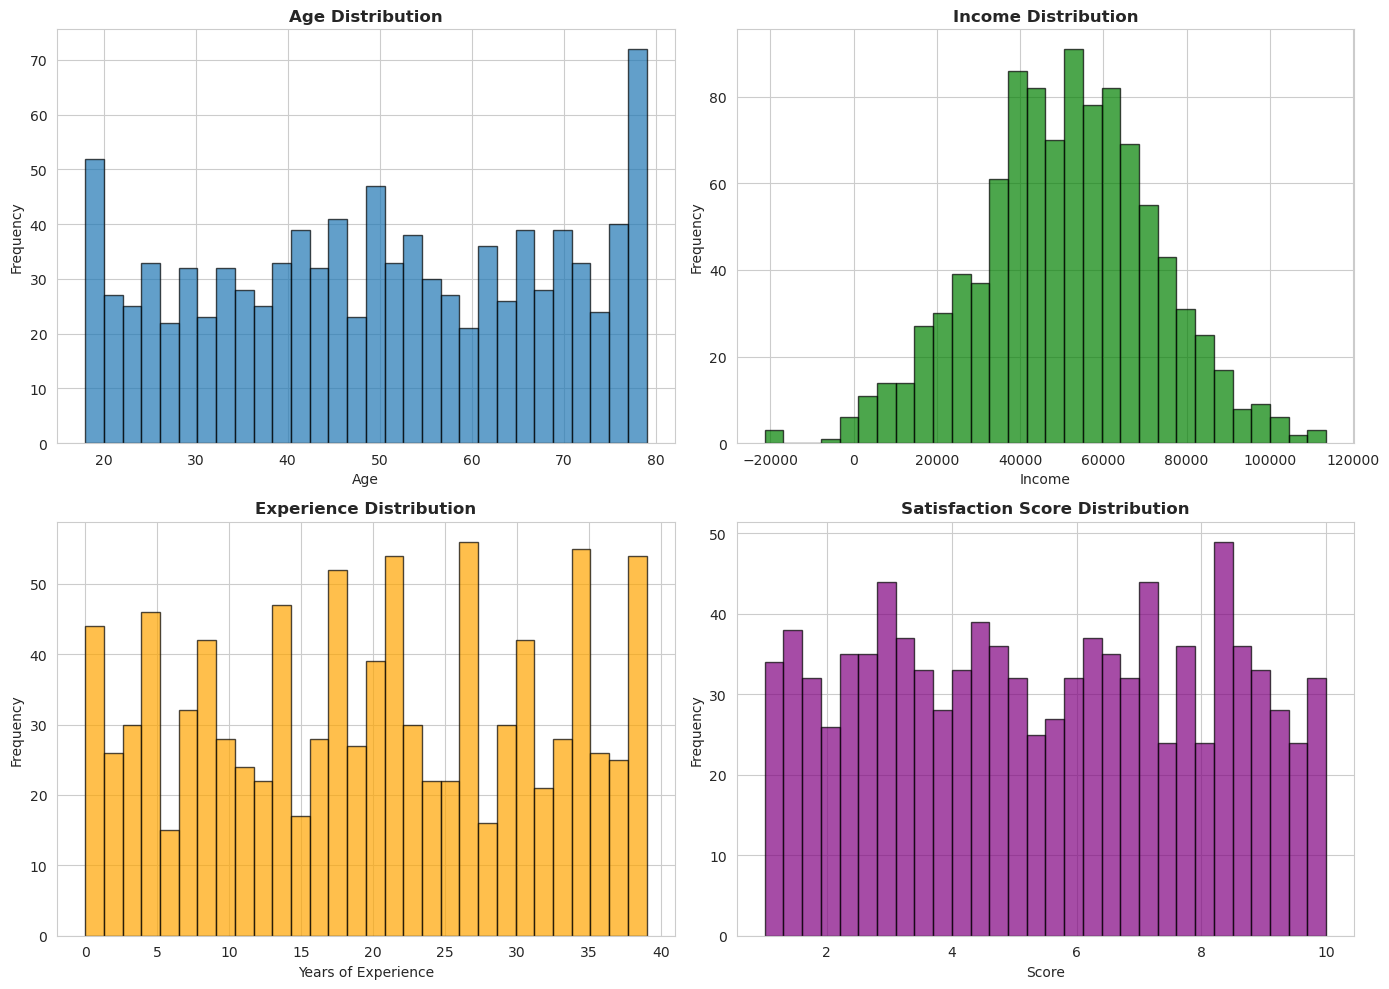

In [5]:
# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age distribution
axes[0, 0].hist(df['age'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Age Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Income distribution
axes[0, 1].hist(df['income'], bins=30, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_title('Income Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Income')
axes[0, 1].set_ylabel('Frequency')

# Experience distribution
axes[1, 0].hist(df['experience'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].set_title('Experience Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Years of Experience')
axes[1, 0].set_ylabel('Frequency')

# Satisfaction score distribution
axes[1, 1].hist(df['satisfaction_score'], bins=30, edgecolor='black', alpha=0.7, color='purple')
axes[1, 1].set_title('Satisfaction Score Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Score')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

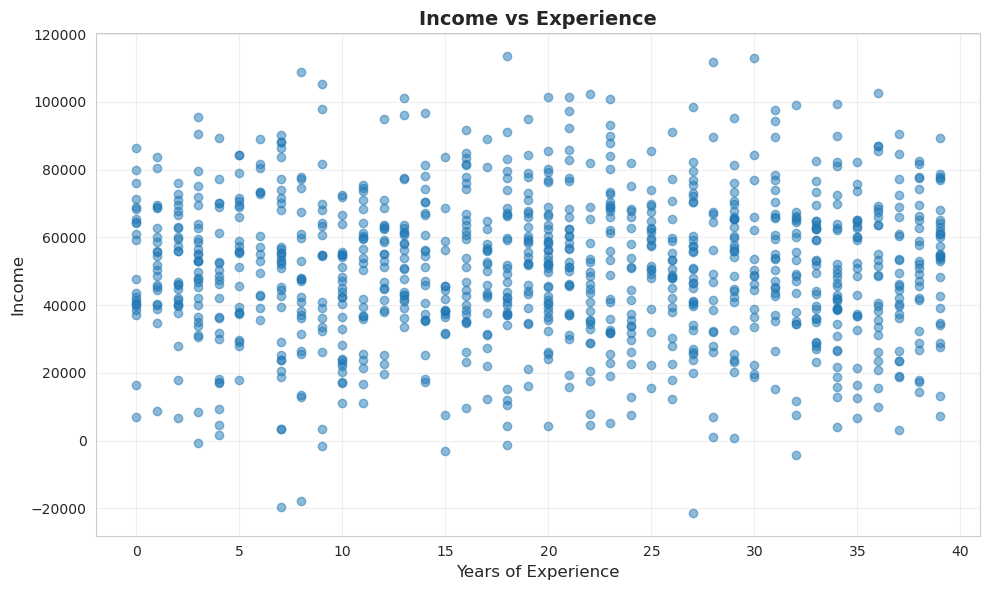

In [6]:
# Scatter plot: Income vs Experience
plt.figure(figsize=(10, 6))
plt.scatter(df['experience'], df['income'], alpha=0.5)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.title('Income vs Experience', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

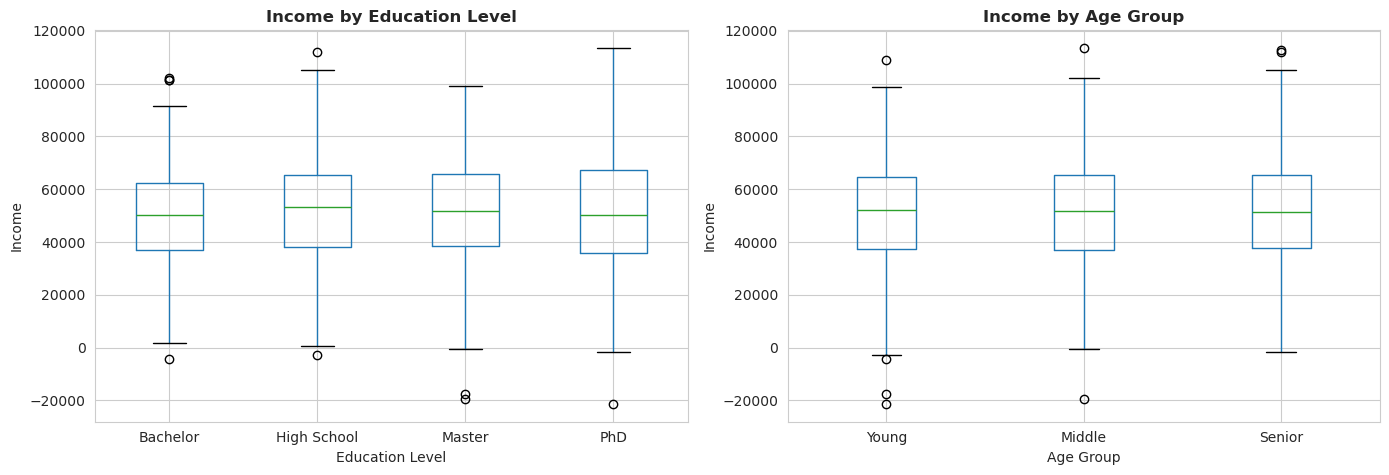

In [7]:
# Box plots for categorical variables
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Income by education level
df.boxplot(column='income', by='education_level', ax=axes[0])
axes[0].set_title('Income by Education Level', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Education Level')
axes[0].set_ylabel('Income')

# Income by age group
df.boxplot(column='income', by='age_group', ax=axes[1])
axes[1].set_title('Income by Age Group', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Income')

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

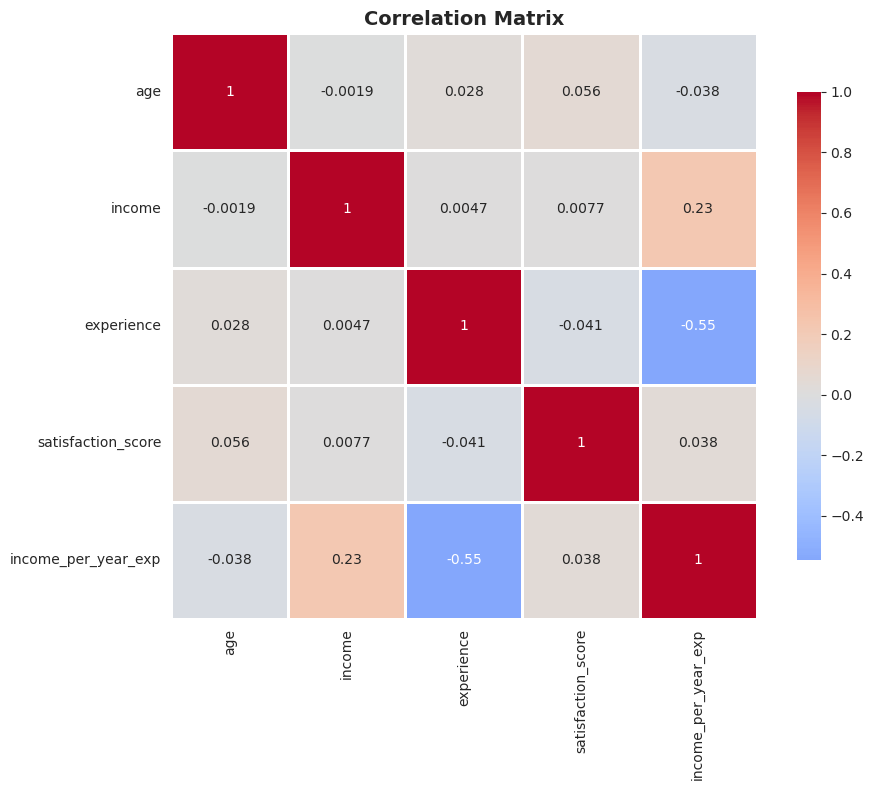

In [8]:
# Correlation heatmap
numeric_cols = ['age', 'income', 'experience', 'satisfaction_score', 'income_per_year_exp']
correlation = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Statistical Analysis

In [9]:
# Group by analysis
print("Average Income by Education Level:")
education_stats = df.groupby('education_level')['income'].agg(['mean', 'median', 'std', 'count'])
display(education_stats)

print("\nAverage Income by Age Group:")
age_stats = df.groupby('age_group')['income'].agg(['mean', 'median', 'std', 'count'])
display(age_stats)

Average Income by Education Level:


,mean,median,std,count
education_level,,,,
Bachelor,49938.952003,50218.397351,19388.051257,234
High School,51708.413380,53179.806126,21579.772376,272
Master,50839.919638,51831.714774,20773.699100,243
PhD,50994.200764,50284.237776,23404.134588,251



Average Income by Age Group:


/tmp/ipykernel_504/2769599697.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = df.groupby('age_group')['income'].agg(['mean', 'median', 'std', 'count'])


,mean,median,std,count
age_group,,,,
Young,51148.560716,52197.201461,22156.447771,191
Middle,50639.762285,51779.045452,21234.320322,323
Senior,50983.600323,51215.976264,21155.113984,486


## 6. Simple Machine Learning Model

In [10]:
# Prepare features and target
X = df[['age', 'experience']].values
y = df['income'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 800 samples
Test set: 200 samples


In [11]:
# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Evaluate
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("Model Performance:")
print(f"  Training R²: {train_r2:.4f}")
print(f"  Test R²: {test_r2:.4f}")
print(f"  Training RMSE: ${train_rmse:,.2f}")
print(f"  Test RMSE: ${test_rmse:,.2f}")

print(f"\nModel Coefficients:")
print(f"  Age: {model.coef_[0]:.2f}")
print(f"  Experience: {model.coef_[1]:.2f}")
print(f"  Intercept: {model.intercept_:.2f}")

Model Performance:
  Training R²: 0.0005
  Test R²: -0.0035
  Training RMSE: $21,336.70
  Test RMSE: $21,386.75

Model Coefficients:
  Age: -242.71
  Experience: 425.18
  Intercept: 50883.25


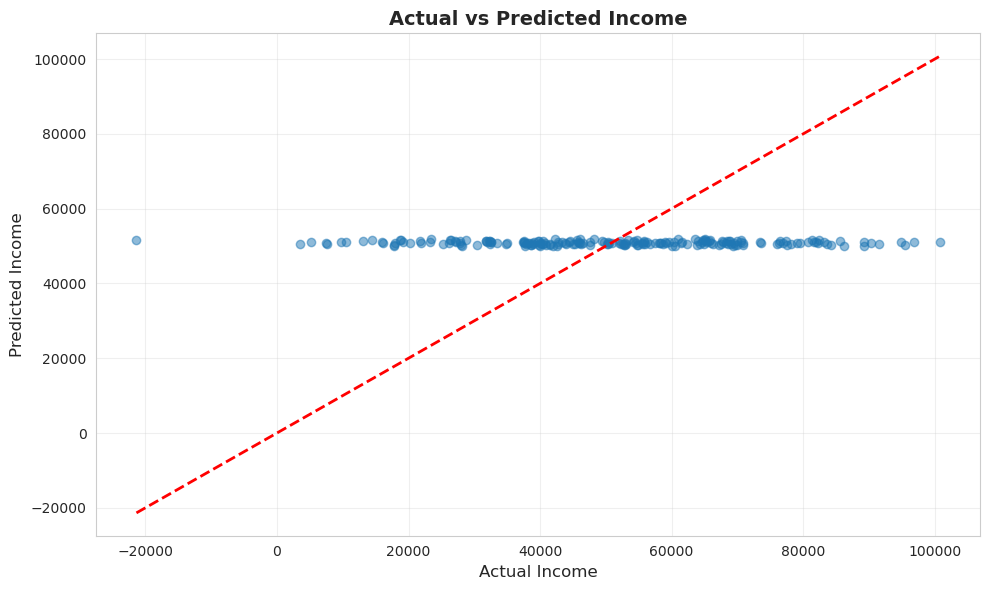

In [12]:
# Visualize predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Income', fontsize=12)
plt.ylabel('Predicted Income', fontsize=12)
plt.title('Actual vs Predicted Income', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Summary

**What we covered:**
- ✅ Data loading and exploration
- ✅ Statistical analysis with pandas
- ✅ Data visualization with matplotlib and seaborn
- ✅ Simple machine learning model
- ✅ Model evaluation and interpretation

**Next steps for your projects:**
1. Replace synthetic data with your actual datasets
2. Perform more sophisticated data cleaning
3. Engineer additional features
4. Try advanced models (Random Forest, XGBoost, Neural Networks)
5. Implement cross-validation
6. Add hyperparameter tuning
7. Export results and models

**Useful Resources:**
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)
- [Scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html)